In [72]:
import matplotlib.pyplot as plt
import numpy as np
import time
import math

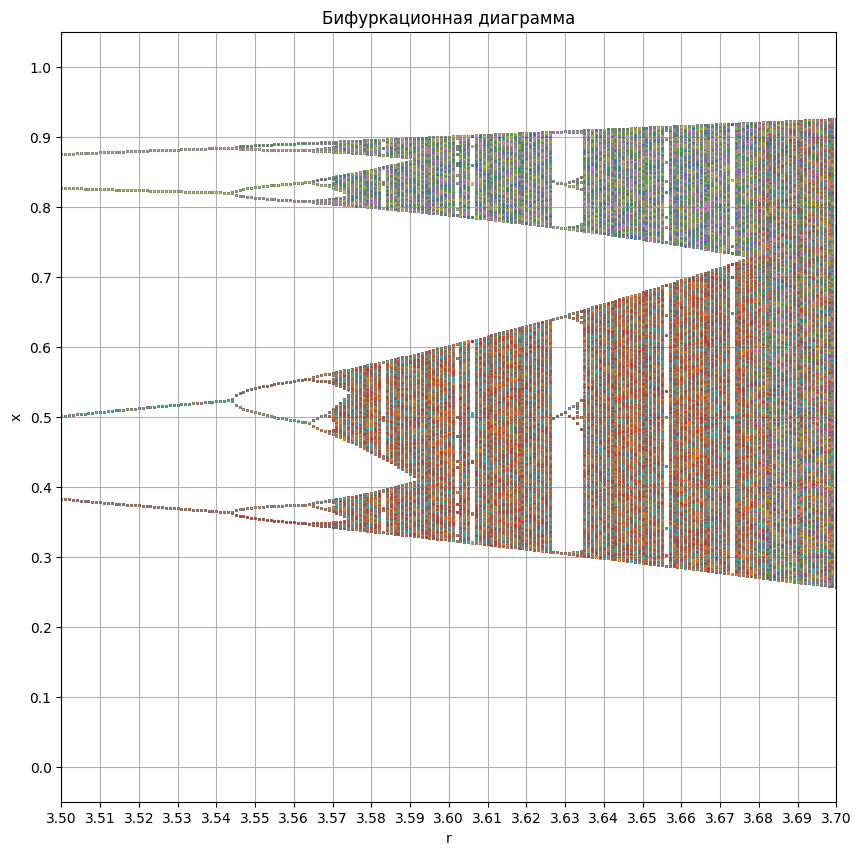

In [68]:
def func(r, x):
    return r * x * (1 - x)
 
def diff(r, x):
    return r * (1 - 2 * x)
 
def bifurcation_diagramm(x0, n, x_val, r_val):
    for i, r in enumerate(r_val):
        x = x0
        for j in range(n):
            x = func(r, x)
            x_val[i, j] = x
 
x0 = 0.5
n_start = 1000
n = 10000
 
h = 0.001
r_val = np.arange(h, 4.0 + h, h)
 
x_val = np.zeros((len(r_val), n))
bifurcation_diagramm(x0, n, x_val, r_val)
 
x_val_diag = x_val[:, n_start:n]
 
 
plt.figure(figsize=(10, 10))
plt.plot(r_val, x_val_diag, '.', markersize = 1)
plt.xlim(3.5, 3.7)
plt.xticks(np.arange(3.5, 3.7, 0.01))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.xlabel('r')
plt.ylabel('x')
plt.title('Бифуркационная диаграмма')
plt.grid(True)
plt.show()
 

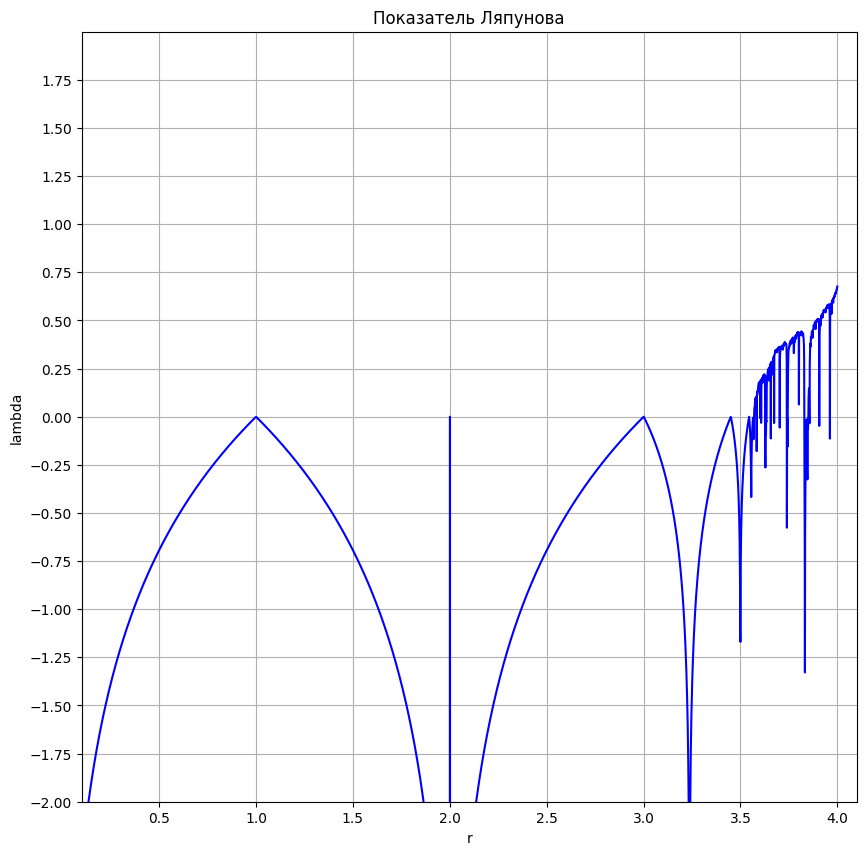

In [75]:
def Lyapunov(x0, n, x_val, r_val, lambda_val):
    for i, r in enumerate(r_val):
        l = 0
        for j in range(n):
            x = diff(r, x_val[i, j])
            if (x == 0):
                continue
            log_x = math.log(abs(x))
            l += log_x
        l = l / n
        lambda_val[i] = l
        
lambda_val = np.zeros(len(r_val))
Lyapunov(x0, len(x_val_diag[0]), x_val_diag, r_val, lambda_val)

ind = np.where(r_val == 2.0)
r_val = np.delete(r_val, ind)
lambda_val = np.delete(lambda_val, ind)

plt.figure(figsize=(10, 10))
plt.plot(r_val, lambda_val, 'b', linestyle='-')
plt.ylim(-2, 2)
plt.yticks(np.arange(-2.0, 2, 0.25))
plt.xlim(0.1, 4.1)
plt.xlabel('r')
plt.ylabel('lambda')
plt.title('Показатель Ляпунова')
plt.grid(True)
plt.show()